<a href="https://colab.research.google.com/github/anushka012/ResNet50_model/blob/main/model_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import preprocess_input as pi

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical 

In [ ]:
num_classes = 3
image_resize_week4 = 224
batch2_size_training = 32
batch2_size_validation = 32

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
X_train = np.load("/content/gdrive/MyDrive/covid_research/X_train.npy").astype(np.uint8)
Y_train = np.load("/content/gdrive/MyDrive/covid_research/Y_train.npy").astype(np.uint8)
X_test= np.load("/content/gdrive/MyDrive/covid_research/X_test.npy")
Y_test = np.load("/content/gdrive/MyDrive/covid_research/Y_test.npy")

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(Y_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
model = Sequential()
#model = tensorflow.keras.Sequential()

In [ ]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fit_history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test), batch_size=10)

Epoch 1/10
1001/1001 [==============================] - 70s 67ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 2.3153e-06 - val_accuracy: 1.0000
Epoch 2/10
1001/1001 [==============================] - 69s 69ms/step - loss: 6.4780e-06 - accuracy: 1.0000 - val_loss: 1.1986e-06 - val_accuracy: 1.0000
Epoch 3/10
1001/1001 [==============================] - 70s 70ms/step - loss: 3.3556e-06 - accuracy: 1.0000 - val_loss: 6.9559e-07 - val_accuracy: 1.0000
Epoch 4/10
1001/1001 [==============================] - 70s 70ms/step - loss: 1.8660e-06 - accuracy: 1.0000 - val_loss: 4.1142e-07 - val_accuracy: 1.0000
Epoch 5/10
1001/1001 [==============================] - 69s 69ms/step - loss: 1.0910e-06 - accuracy: 1.0000 - val_loss: 2.5099e-07 - val_accuracy: 1.0000
Epoch 6/10
1001/1001 [==============================] - 68s 68ms/step - loss: 6.4482e-07 - accuracy: 1.0000 - val_loss: 1.5448e-07 - val_accuracy: 1.0000
Epoch 7/10
1001/1001 [==============================] - 67s 67ms/step - loss: 3.

In [ ]:
model.save('classifier_vgg16_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


**Evaluating the model**

In [ ]:
train_loss, train_acc = model.evaluate_generator(X_train, steps=16)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
test_loss, test_acc = model.evaluate(X_test, steps=16)

16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
print("Train: %.3f, Test: %.3f" % (train_acc, test_acc))

Train: 0.000, Test: 0.000


**Plot training history**

In [ ]:
from matplotlib import pyplot as pyplot
print("Values stored in history are...\n", fit_history.history)

Values stored in history are...
 {'loss': [0.002909336006268859, 6.477985152741894e-06, 3.3556179914739914e-06, 1.8660240357348812e-06, 1.0910479204540025e-06, 6.448205454034905e-07, 3.8946532754380314e-07, 2.3664682657908997e-07, 1.4311733309568808e-07, 8.759703717942102e-08], 'accuracy': [0.9989001154899597, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [2.315327037649695e-06, 1.198557356474339e-06, 6.955862090762821e-07, 4.1142035911434505e-07, 2.509875400846795e-07, 1.5447709245108854e-07, 9.710681325714177e-08, 5.9217327930127794e-08, 3.604275278235036e-08, 2.245970875947023e-08], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


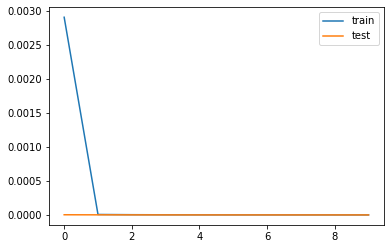

In [ ]:
plt.plot(fit_history.history['loss'], label='train')
plt.plot(fit_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model_2 = load_model('classifier_vgg16_model.h5')

In [ ]:
steps_per_epoch_test_2 = int(len(X_test)/ 64)

In [ ]:
score_2 = pretrained_model_2.evaluate_generator(X_test, steps=steps_per_epoch_test_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('Accuracy of ResNet50: {}% \n Error: {}'.format(score_2[1], 1 - score_2[1]))

Accuracy of ResNet50: 0.0% 
 Error: 1.0


In [ ]:
import numpy as np

In [ ]:
predict2 = pretrained_model_2.predict_generator(X_test, steps=steps_per_epoch_test_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
class_names= ['0', '1', '2']

In [ ]:
label2index = {0:0, 1:1, 2:2}

In [ ]:
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)

The list of classes:  [0, 1, 2]


In [ ]:
print("ResNet50 Predictions :")
for i in range(0, 10):
    pred_class = np.argmax(predict2[i])
    pred_label = list_of_label[pred_class]
    print('Prediction :{}'.format(
        pred_label,
        predict2[i][pred_class]))
    # img = Image.open(predict2[i])
    # img.show()

ResNet50 Predictions :
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
Prediction :2
